# Classification Task and Evaluation Measures


Classification models are another broad class of predictive models. Following the Machine Learning terminology, it is common to talk about classification or regression "tasks". These are the two main classes of tasks belonging to the broader class of reinforcement learning.

## Task Definition
Recall that a predictive model is a function defined as follows:

$$h : \mathcal{X} \to \mathcal{Y}$$

If in the case of regression $\mathcal{X}=\Re^n$ and $\mathcal{Y}=\Re^m$, in the case of classification, the output targets are discrete values **which are generally referred to as "classes"**. Without loss of generality, if there are $M$ classes, then we define $\mathcal{Y}=\{1,\ldots,M\}$. If the inputs are numerical vectors (it does not have to always be this way, but we can usually employ a representation function to map the input to a numerical vector), a classification model can be defined as:

$$h : \Re^n \to \{0,\ldots,M-1\}$$

Also in this case, we will assume to have a set of data to train and evaluate our model

$$\text{D}=\{(x_i,y_i)\}_{i=1}^N$$

Note that in this case $x_i\in \Re^n$ and $y_i \in \{0,\ldots,M-1\}$. Here, the values $y_i$ are generally called "**labels**", while the values $\hat y = h(x)$ predicted using the classifier $h$ are called **predicted labels**.

We can find the optimal model $h$ by minimizing the empirical risk. A possible loss function is the following one:

$$L(\hat y, y) = \begin{cases}1 &\text{ if }& \hat y \neq y \\ 0 &\text{ if }& \hat y=y \end{cases}$$

Hence, the empirical risk will be the fraction of incorrect predictions:

$$R_{emp}(h) = \frac{1}{N} \sum_{i=1}^N L(\hat y_i, y_i) = \frac{\text{number of incorrect predictions}}{N}$$

The empirical risk computed as defined above is also known as **error rate**. It is a number comprised between $0$ and $1$ which can also be interpreted as a percentage.

The classifier can be learned by minimizing the empirical risk:

$$\hat h = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R_{emp}(h)$$

### Examples

Classifiers support decision making any time that observations need to be categorized in one of a predefined set of classes. Examples of such problems are:

-   Detecting spam emails (**spam vs legitimate email classification**).

-   Classifying social media posts as being about politics or something else
    (**politics vs non-politics classification**).

-   Recognizing the object depicted in an image out of 1000 different
    objects (**object recognition**).

For example, we can define spam detection as follows:

-   *Task*: given an e-mail, classify it as spam or non-spam.

-   *Input example* $\mathbf{e}$: the text of the e-mail. This can be a
    sequence of characters of arbitrary length. We can use some **representation function** to map an email $\mathbf{e}$ to a vector of real numbers $\mathbf{x} \in \Re^n$. We also assume that a training set pairing the vectors $\mathbf{x}$ with labels $y \in \{ 0,1\}$ is available.

-   *Classifier*: a function $h:\Re^n \rightarrow \{ 0,1\}$.

-   *Output*: a predicted label  $\widehat{y} \in \{ 0,1\}$ indicating
    if the e-mail is legitimate or spam. Here we have a **binary
    classification task**, hence $M = 2$.



## Eavaluation Measures

As with the case of regression, we need to define evaluation measures. These will be useful to  **guide
training** (e.g., modify the parameters in order to improve the performance of the algorithm on the training set), **tune hyper-parameters** and to **finally assess that the algorithm works on unseen data** (the test set).

As in the case of regression, we will consider the set of **ground truth test labels**:

$$Y_{TE} = \left\{ y^{(i)}|\left( \mathbf{x}^{(i)},y^{(i)} \right) \in TE \right\}_{i}$$

and the set of **predicted test labels** :

$${\widehat{Y}}_{TE} = \left\{ h\left( \mathbf{x}^{(i)} \right)|\left( \mathbf{x}^{(i)},y^{(i)} \right) \in TE \right\}_{i}$$

which will be used as inputs of our performance measures.

### Accuracy

Accuracy is a very common performance measure. We define accuracy as
**the percentage of test examples for which our algorithm has predicted
the correct label**:

$$Accuracy\left( Y_{TE},{\widehat{Y}}_{TE} \right) = \frac{\left| \left\{ y^{(i)} : y^{(i)} = {\widehat{y}}^{(i)} \right\} \right|}{|Y_{TE}|}$$

For instance, if the test set contains $100$ examples and for $70$ of
them we have predicted the correct label, then we will have:

$$Accuracy\left( Y_{TE},{\widehat{Y}}_{TE} \right) = \frac{70}{100} = 0.7$$

Note that accuracy is always a number comprised between 0 and 1. We can
see the accuracy as a percentage. For instance, in the example above we
could say that we have an accuracy of $70\%$.

### Error Rate
The error rate is closely associated to accuracy and defined as:

$$ErrorRate\left( Y_{TE},{\widehat{Y}}_{TE} \right) = \frac{\left| \left\{ y^{(i)} : y^{(i)} \neq {\widehat{y}}^{(i)} \right\} \right|}{|Y_{TE}|} =  1- Accuracy\left( Y_{TE},{\widehat{Y}}_{TE} \right)$$

#### Example - Imbalanced Dataset

To see the limits of accuracy, let us consider a dataset containing
$10000$ elements of two classes distributed as follows:

-   $500$ data points from class $0$;

-   $9500$ data points from class $1$.

Let us now consider a naïve classifier which always predicts class 1:

$$f\left( \mathbf{x} \right) = 1$$

Intuitively, we see that this classifier is not a good one, as it
discards its input and just predicts the most frequent class. However,
it can be easily seen that its accuracy is $0.95$.



### Error Types 

The main limitation of the accuracy is that it counts the number of
mistakes made by the algorithm, but it does not consider which types of
mistakes it makes. In general, on each example, we can make two kinds of mistakes:

-   **Type 1**: we classify an example as belonging to the considered
    class, but it does not. These kinds of misclassifications are often
    called **False Positives (FP)**.

-   **Type 2**: we classify the example as not belonging to the
    considered class, but it does belong to it. These kinds of
    misclassifications are often called **False Negatives (FN)**.

We can also have two kinds of correct predictions:

-   **True Positives (TP)**: these are elements from the considered
    class which have been classified as actually belonging to that
    class.

-   **True Negatives (TN)**: these are elements which are not from the
    considered class and have been classified as actually not belonging
    to that class.

### Confusion Matrix

To have a more complete view of how our classifier is performing, we can
put these numbers in a table which we will call a **confusion matrix**:

![](/_static/lecture_specific/classification/confusion.png)

In the matrix, the rows indicate the true labels, whereas the columns
indicate the predicted labels. A good confusion matrix has large numbers
in the main diagonal (TP and TN) and low numbers in the rest of the
matrix (where the errors are).

The accuracy can be recovered from the confusion matrix as follows:

$$Accuracy = \frac{TP + TN}{TP + FN + FP + TN}$$

which consists in **summing the numbers on the diagonal and dividing by
the sum of all numbers**. We can see the computation of the accuracy
from the confusion matrix graphically as follows:

![](/_static/lecture_specific/classification/confusion2.png)


#### Example 1 -- Spam Detector

Let us consider a spam detector which correctly detects $40$ out of $50$
spam emails, while it only recognizes $30$ out of $50$ legitimate
emails. The confusion matrix associated to this classifier will be as
follows:

![](/_static/lecture_specific/classification/spam.png)

Its accuracy will be:

$$Accuracy = \frac{40 + 30}{40 + 10 + 20 + 30} = \frac{70}{100} = 0.7$$

#### Example 2 -- Imbalanced Dataset

Let us now consider the example of our imbalanced dataset with $9500$
data points of class 1 and $500$ data points of class 0. The confusion
matrix of the naïve classifier $f\left( \mathbf{x} \right) = 1$ will be:

![](/_static/lecture_specific/classification/imbalanced.png)

If we compute the accuracy of this classifier, we will obtain a good
performance:

$$Accuracy = \frac{9500}{9500 + 500} = 0.95$$

However, looking at the confusion matrix, **it is clear that something
is wrong, and our classifier is not working well**.



### Precision and Recall

The confusion matrix allows to understand if there is an issue with the
classifier in the case of imbalanced data. However, it is still
convenient to have scalar measures which can tell us something about how
the classifier is doing. In practice, it is common to define two
complementary measures: precision and recall.

**Precision** measures **how many of the examples which have been
classified as positives were actually positives** and is defined as
follows:

$$Precision = \frac{TP}{TP + FP}$$

**Recall** measures **how many of the examples which are positives, have
been correctly classified as positives** and is defined as follows:

$$Recall = \frac{TP}{TP + FN}$$

We can see graphically the computation of precision and recall as
follows:

![](/_static/lecture_specific/classification/precision_recall.png)

#### High Precision vs High Recall

These values capture different properties of the classifier. Depending
on the application, we may want to have a higher precision or a higher
recall. For example:

-   Consider a **spam detector**: we may want to have a very **high
    precision**, even at the cost of a **low recall**. Indeed, we want
    to make sure that if we classify an e-mail as spam (and hence we
    filter it out), it is actually spam (hence a high precision). This
    is acceptable even if sometimes we let a spam email get through the
    filter (hence a low recall).

-   Consider a **medical pre-screening** test which is used to assess if
    a patient is likely to have a given pathology. The test is cheap
    (e.g., a blood test) and can be made on a large sample of patients.
    If the test is positive, we then perform a more expensive but
    accurate test. In this case, we want to have a **high recall**.
    Indeed, if a patient has the pathology, we want to detect it and
    send the patient for the second, more accurate test (hence a high
    precision). This is acceptable even if sometimes we have false
    positives (hence a low precision). Indeed, if we wrongly detect a
    pathology, the second test will give the correct result.

Precision and recall can often have contrasting values (e.g., we can
obtain a high precision but a low recall and vice versa), hence it is
generally **necessary to look at both numbers together**.



#### Example -- Spam Detector

Let us consider again the spam example, with the classifier obtaining
this confusion matrix:

![](/_static/lecture_specific/classification/spam.png)

From the confusion matrix, we see that:

-   TP=40.

-   FN=10.

-   FP=20.

-   TN=30.

We can compute the following precision and recall values:

-   $Precision = \frac{40}{20 + 30} = 0.8$;

-   $Recall = \frac{40}{40 + 20} = 0.67$.

Like the accuracy, precision and recall are telling us that the
classifier is not perfect. Interestingly, these measures are telling us
that **while most of the detected e-mails are actually spam, not all
spam e-mails are correctly detected.** Considering this application, we
may want to have a very high precision, (i.e., if we detected an e-mail
as spam, we want to make sure that it is actually spam) **even at the
cost of a lower recall.**



### $F_{1}$ Score

We have seen that precision and recall describe different aspects of the
classifier and hence it is often a good idea to look at them jointly.
However, it is often convenient to have a single number which classifies
both numbers.

The $F_{1}$ score allows to do exactly this, by computing the **harmonic
mean** of precision and recall:

$$F_{1} = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

We can note that, in order to obtain a large $F_{1}$ score, we need to
obtain **both a large precision and a large recall.** This is a property
of the harmonic mean, as it is illustrated in the following example
which compares the arithmetic mean (precision/2+recall/2) to the
harmonic mean (the $F_{1}$ score):

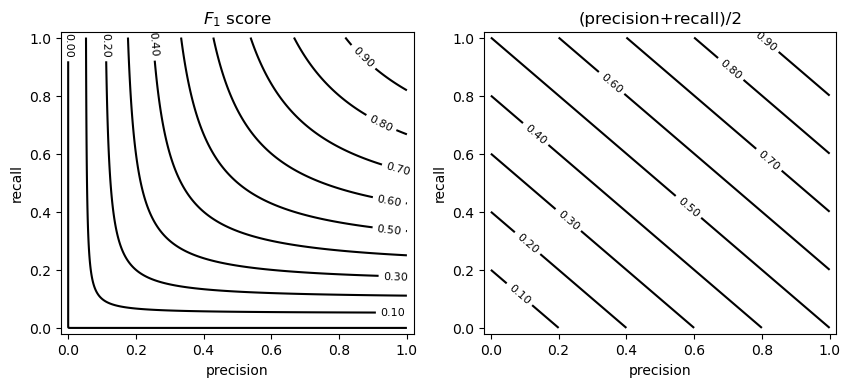

In [4]:
import numpy as np
precision,recall=np.meshgrid(np.linspace(0,1,500), np.linspace(0,1,500))
f1 = (2*precision*recall)/(precision+recall+0.00000001)
mean = (precision+recall)/2

from matplotlib import pyplot as plt
plt.figure(figsize=(10,4), dpi=100)
plt.subplot(1,2,1)
contours = plt.contour(precision, recall, f1, colors='black', levels=11);
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.2f')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title("$F_1$ score")
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])

plt.subplot(1,2,2)
contours = plt.contour(precision, recall, mean, colors='black', levels=11);
plt.clabel(contours, inline=True, fontsize=8, fmt='%1.2f')
plt.xlabel('precision')
plt.ylabel('recall')
plt.title("(precision+recall)/2")
plt.xlim([-0.02,1.02])
plt.ylim([-0.02,1.02])
plt.show()

The example above shows the isocurves obtained by considering given
precision and recall values. As can be noted, to obtain a large $F_{1}$
score, we need to have both a large precision and a large recall.

#### Example - Spam Detector

Let us consider again the spam example, with the classifier obtaining
this confusion function:

![](/_static/lecture_specific/classification/spam.png)

Starting from the precision and recall values previously computed:


-   $Precision = \frac{40}{20 + 30} = 0.8$;

-   $Recall = \frac{40}{40 + 20} = 0.67$.

we can compute the $F_{1}$ score as:

$$F_{1} = 2\frac{precision \cdot recall}{recall + recall} = \frac{1.072}{1.47} = 0.72$$

Note that, since the dataset is balanced, this value is not very
different from the accuracy of $0.7$.



### Confusion Matrix for Multi-Class Classification

We have seen the confusion matrix in the case of binary classification.
However, it should be noted that the confusion matrix generalizes to the
case in which there are $M$ classes. In that case, the confusion matrix
is $M \times M$ and its general element $C_{ij}$ indicates the number of
elements **belonging to class i, which have been classified as belonging
to class j**. An example of a confusion matrix in the case of three
classes is the following:

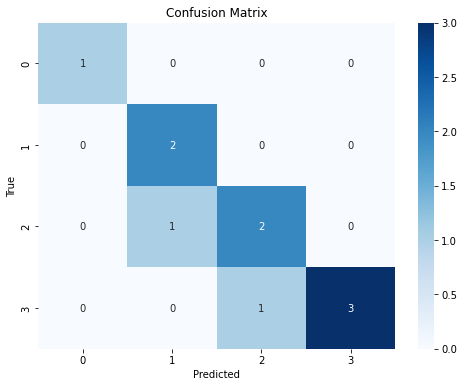

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example data (replace this with your actual data)
true_labels = [0, 1, 1, 2, 2, 2, 3, 3, 3, 3]
predicted_labels = [0, 1, 1, 2, 1, 2, 3, 3, 3, 2]

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Similar to the binary case, we expect to have large numbers on the
diagonal and small number in all other cells. The concepts of precision,
recall and $F_{1}$ score generalize considering a binary classification
task for each of the classes (i.e., distinguishing each class from all
the others). Hence, in the example shown above, we would have three
$F_{1}$ scores:

In [7]:

from sklearn.metrics import f1_score
# Compute F1 scores
f1_scores = f1_score(true_labels, predicted_labels, average=None)

print(f1_scores)


[1.         0.8        0.66666667 0.85714286]


### ROC (Receiver Operating Characteristic) Curve and Area Under the Curve (AUC) Measures
As previously mentioned, some binary classifiers output a probability or a confidence score and allow to obtain class predictions by thresholding on such probabilities or scores. When the confidence value is not a probability, it might not be easy to interpret it and find a good threshold. Even when the classifier outputs a probability, the optimal threshold might not be $0.5$. For instance, we may want to build an intrusion detection system which is more or less sensitive to potential intrusions.

The ROC curve allows to evaluate the performance of a classifier independently from the threshold. Specifically, let 

$$c(\mathbf{x})$$

be a function predicting a confidence value from an input vector $\mathbf{x}$. For instance, in the case of the logistic regressor:

$$c(\mathbf{x}) = \sigma(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n)$$

We will define our classification function as:

$$h_\theta(\mathbf{x}) = [\sigma(\beta_0 + \beta_1 x_1 + \ldots + \beta_n x_n) \geq \theta]$$

where $[\cdot]$ denotes the Iverson brackets and $\theta \in \Re$ is a real-valued threshold.

Depending on the chosen value of the threshold, we will have a given number of true positives, true negatives, false positives and false negatives:

$$TP_\theta$$
$$TN_\theta$$
$$FP_\theta$$
$$FN_\theta$$

We will define the true positive rate (TPR) and false positive rate (FPR) as follows:

$$TPR_\theta = \frac{TP_\theta}{TP_\theta+FN_\theta}$$

$$FPR_\theta = \frac{FP_\theta}{FP_\theta+TN_\theta}$$

In practice:

* The TPR is the fraction of true positives over all positive elements - **this is the same as the recall**;
* The FPR on the contrary is the fraction of false positive predictions over all negative elements.

We note that:
* If we pick **low threshold values, both the TPR and the FPR will be equal to 1**. Indeed, with a small enough threshold, all elements will be classified as positives and there will be no predicted negatives, so the TPR will be equal to 1. At the same time, the FPR will be 1 because we will have no true negatives;
* If we pick **high threshold values, both the TPR and the TNR will be zero**. Indeed, with a large enough threshold, all elements will be classified as negatives and there will be no positive predictions, so the TPR will be zero. At the same time, since all elements will be classified as negatives and there will be no false positive predictions, the FPR will be equal to $0$;

An ROC curve is obtained by picking a threshold value $\theta$ and plotting a 2D point $(TPR_\theta, TNR_\theta)$. By varying the threshold $\theta$, we obtain a curve which tell us what is the trade-off between TPR and TNR regardless of the threshold.

The following plot show an example of an ROC curve for a binary classifier on the breast cancer dataset:

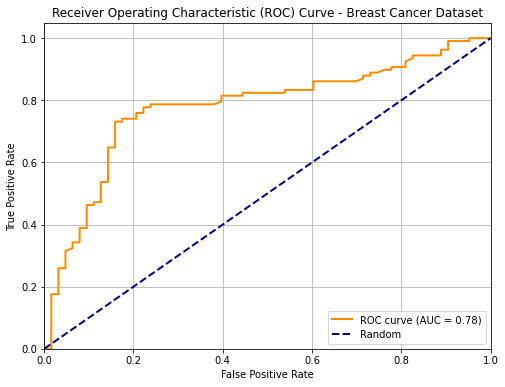

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data[:,[1]]
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Breast Cancer Dataset')
plt.legend(loc='lower right')
plt.grid()
plt.show()


We know that the two points $(0,0)$ and $(1,1)$ belong to the curve. Ideally, starting from a low threshold (with TPR=FPR=1), as we move the threshold up enough, **we would expect the FPR to decrease (we are discarding false positives), while the TPR is still high (we are not discarding true positives)**. Hence the ideal curve should be a rectangular curve touching point $(0,1)$. In practice, we can measure the area under the ROC curve to see how well the classifier is doing. This value is generally referred to as "AUC".


The dashed line indicates the performance of a random predictor. Note the the area under the curve identified by this dashed line will be equal to $0.5$. Any curve which is systematically below this line indicates a classifier which is doing thresholding in the wrong way (i.e. we should invert the sign of the thresholding). For instance, this is the curve of the same classifier when we invert the sign of thresholding:

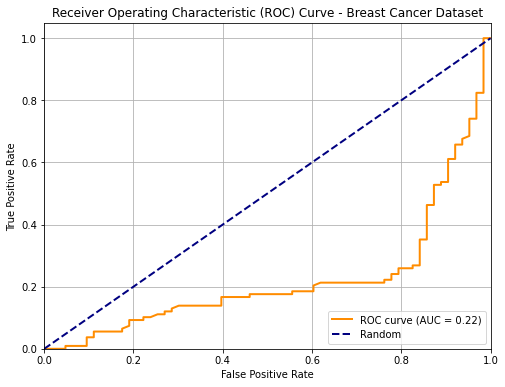

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data[:,[1]]
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_scores = -model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Breast Cancer Dataset')
plt.legend(loc='lower right')
plt.grid()
plt.show()


We can use ROC curves to compare two different classifiers as shown in the following:

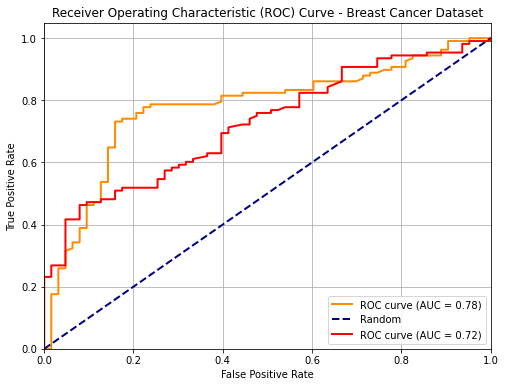

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
model = LogisticRegression()
model.fit(X_train[:,[1]], y_train)
# Predict probabilities on the test set
y_scores = model.predict_proba(X_test[:,[1]])[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Breast Cancer Dataset')
plt.legend(loc='lower right')


model = LogisticRegression()
model.fit(X_train[:,[4]], y_train)
# Predict probabilities on the test set
y_scores = model.predict_proba(X_test[:,[4]])[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()
plt.show()


## References

-   Evaluation Measures for Classifcation:
    <https://en.wikipedia.org/wiki/Precision_and_recall>